<a href="https://colab.research.google.com/github/jespimentel/produtividade_ssp/blob/main/pris%C3%B5es_e_apreens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prisões e apreensões de 2024 e 2025 em Piracicaba**
### Dados da SSP
### José Eduardo de Souza Pimentel

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def remover_acentos(texto):
    """Remove acentos e caracteres especiais de uma string."""
    if isinstance(texto, str):
        return ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')
    return texto

In [4]:
# Seleciona o município de interesse
municipio='PIRACICABA'

In [5]:
%%time
caminho=('/content/drive/MyDrive/Datasets/ssp/DadosProdutividade_2024.xlsx')
sheet_name='PRESOS E APREENDIDOS_2024'
df_2024 = pd.read_excel(caminho, sheet_name=sheet_name)
df_2024 = df_2024[df_2024['NOME_MUNICIPIO'] == municipio]

CPU times: user 1min 43s, sys: 866 ms, total: 1min 44s
Wall time: 1min 47s


In [6]:
%%time
caminho=('/content/drive/MyDrive/Datasets/ssp/DadosProdutividade_2025.xlsx')
sheet_name='PRESOS E APREENDIDOS_2025'
df_2025 = pd.read_excel(caminho, sheet_name=sheet_name)
df_2025 = df_2025[df_2025['NOME_MUNICIPIO'] == municipio]

CPU times: user 8.59 s, sys: 78 ms, total: 8.67 s
Wall time: 8.7 s


In [7]:
df_2025.columns

Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'NOME_MUNICIPIO', 'ANO_BO', 'NUM_BO', 'CIDADE',
       'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC',
       'NOME_MUNICIPIO_CIRC', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO',
       'DATAHORA_REGISTRO_BO', 'DATA_COMUNICACAO_BO', 'DESCR_PERIODO',
       'FLAG_FLAGRANTE', 'FLAG_STATUS', 'DESCR_TIPOLOCAL',
       'DESCR_SUBTIPOLOCAL', 'BAIRRO', 'CEP', 'LOGRADOURO',
       'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'CONT_PESSOA',
       'DESCR_TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR_CURTIS',
       'DESCR_PROFISSAO', 'DESCR_GRAU_INSTRUCAO', 'NACIONALIDADE_PESSOA',
       'NATUREZA_APURADA', 'MES_ESTATISTICA', 'ANO '],
      dtype='object')

In [8]:
# Concatena os dataframes
df_combined = pd.concat([df_2024, df_2025], ignore_index=True)
df_combined['PRESO_APREENDIDO'] = df_combined['IDADE_PESSOA'].apply(lambda x: 'Adolescente' if x < 18 else 'Imputável')
df_combined = df_combined[['ANO ', 'MES_ESTATISTICA', 'NOME_MUNICIPIO', 'ANO_BO', 'NUM_BO', 'DATA_OCORRENCIA_BO','HORA_OCORRENCIA_BO', 'FLAG_FLAGRANTE',
                           'PRESO_APREENDIDO','DESCR_TIPOLOCAL','DESCR_SUBTIPOLOCAL', 'BAIRRO', 'CEP', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE',
                           'LONGITUDE','DESCR_TIPO_PESSOA','SEXO_PESSOA', 'IDADE_PESSOA', 'COR_CURTIS','DESCR_PROFISSAO', 'DESCR_GRAU_INSTRUCAO']]
df_combined['BAIRRO'] = df_combined['BAIRRO'].apply(remover_acentos).str.upper() # Remove acentos dos bairros
df_combined.to_excel('presos_e_apreendidos.xlsx', index=False)
df_combined.sample(5)

,ANO,MES_ESTATISTICA,NOME_MUNICIPIO,ANO_BO,NUM_BO,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_FLAGRANTE,PRESO_APREENDIDO,DESCR_TIPOLOCAL,...,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,DESCR_TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR_CURTIS,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
984,2024,6,PIRACICABA,2024,HZ9054,2024-06-11,23:30:00,S,Imputável,Via Pública,...,AVENIDA PROFESSSOR BENEDITO DE ANDRADE,730.0,-22.731166,-47.594008,Indiciado,M,31.0,Parda,Soldador(a),1º Grau incompleto
703,2024,4,PIRACICABA,2024,FM3967,2024-04-21,19:30:30,S,Imputável,Via Pública,...,RUA SÃO DIMAS,227.0,-22.744945,-47.625238,Indiciado,M,25.0,Parda,Desempregado,2º Grau completo
2025,2025,1,PIRACICABA,2025,AK0973,2025-01-09,09:59:19,N,Imputável,Residência,...,VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,0.000000,0.000000,Capturado,M,32.0,Parda,NaN,NaN
1733,2024,11,PIRACICABA,2024,QL2363,2024-11-28,12:30:02.0000000,N,Imputável,Via Pública,...,RUA PRAÇA JOSÉ BONIFÁCIO,1.0,-22.724557,-47.648468,Capturado,M,29.0,Parda,NaN,NaN
252,2024,2,PIRACICABA,2024,BP7938,2024-02-03,10:55:00,S,Imputável,Via Pública,...,RUA ANTONIO FRANCO DE LIMA,1179.0,-22.677128,-47.663858,Indiciado,M,40.0,Parda,Ajudante,1º Grau completo


In [9]:
bairros = sorted(df_combined['BAIRRO'].astype(str).unique().tolist())
n=0
for bairro in bairros:
    print(bairro, end= ', ')
    n+=1
    if n%5==0:
        print()

ABAETE, AGUA BRANCA, AGUA SANTA, AGUA SECA, ALEMAES, 
ALGODOAL, ALTO, ALTOS DO SAO FRANCISCO, ANHUMAS, AREA RURAL, 
AREIAO, ARTEMIS, BOA ESPERANCA, BONGUE, BOSQUE DOS LENHEIROS, 
CAMPESTRE, CANTA GALO, CANTAGALO, CAPIM FINO, CASTELINHO, 
CECAP, CENTRO, CENTRO (ARTEMIS), CENTRO (TUPI), CENTRO COMERCIAL AGRICOLA TAQUARAL, 
CHACARA SAO JORGE, CIDADE ALTA, CIDADE JARDIM, COMUNIDADE PORTELINHA, CONCEICAO, 
CONJUNTO HABITACIONAL AGUA BRANCA, CONJUNTO RESIDENCIAL MARIO DEDINI, COSTA RICA, DOIS CORREGOS, ENGENHO CENTRAL, 
ENXOFRE, ESTANCIA LAGO AZUL (ARTEMIS), GARCAS, GIBOIA, GLEBA CALIFORNIA, 
GLEBAS, GLEBAS ALIANCA, GLEBAS CALIFORNIA, GODINHO, GRAN PARK RESIDENCIAL, 
GRANDE PARQUE RESIDENCIAL, GUAMIUM, HIGIENOPOLIS, IAA, IBITIRUNA, 
INDEPENDENCIA, JARAGUA, JARDIM ABAETE, JARDIM ALVORADA, JARDIM ASTURIAS I, 
JARDIM BARTIRA (TUPI), JARDIM BELVEDERE, JARDIM BELVERDE, JARDIM BOA VISTA, JARDIM BRASIL, 
JARDIM CALIFORNIA, JARDIM CAMARGO, JARDIM CAXAMBU, JARDIM COLINA VERDE, JARDIM CONCEICAO, 
JARD

In [10]:
# Substitui variações por 'MARIO DEDINI' na coluna 'BAIRRO'
df_combined['BAIRRO'] = df_combined['BAIRRO'].replace('MARIO DEDINE', 'MARIO DEDINI')
df_combined['BAIRRO'] = df_combined['BAIRRO'].replace('CONJUNTO RESIDENCIAL MARIO DEDINI', 'MARIO DEDINI')

# Filtra os bairros selecionados
bairros_selecionados = ['MARIO DEDINI','BOSQUE DOS LENHEIROS','ALGODOAL']

In [11]:
df_combined_selecionado = df_combined[df_combined['BAIRRO'].isin(bairros_selecionados)]
contagem = df_combined_selecionado.groupby(['ANO ', 'MES_ESTATISTICA', 'BAIRRO','PRESO_APREENDIDO'])['PRESO_APREENDIDO'].count().unstack().fillna(0)
contagem.reset_index(inplace=True)
contagem ['ano_mes'] = contagem['ANO '].astype(str) + '-' + contagem['MES_ESTATISTICA'].astype(str)
contagem = contagem.drop(columns=['ANO ', 'MES_ESTATISTICA'])
contagem = contagem.set_index('ano_mes')
contagem

PRESO_APREENDIDO,BAIRRO,Adolescente,Imputável
ano_mes,,,
2024-1,ALGODOAL,0.0,2.0
2024-1,BOSQUE DOS LENHEIROS,0.0,3.0
2024-1,MARIO DEDINI,0.0,5.0
2024-2,ALGODOAL,0.0,5.0
2024-2,BOSQUE DOS LENHEIROS,2.0,1.0
2024-2,MARIO DEDINI,0.0,15.0
2024-3,ALGODOAL,0.0,4.0
2024-3,BOSQUE DOS LENHEIROS,0.0,3.0
2024-3,MARIO DEDINI,0.0,6.0


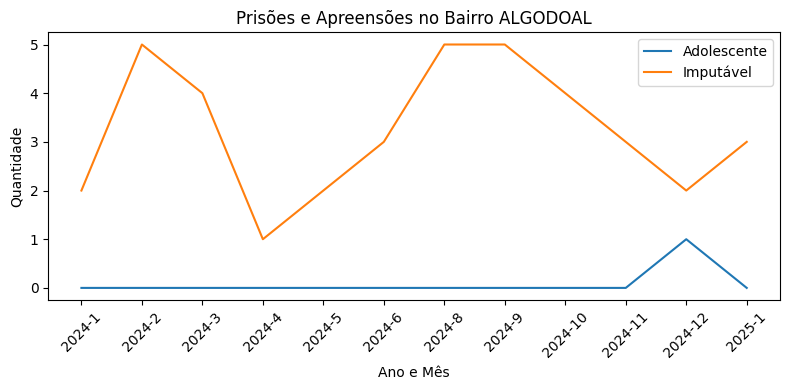

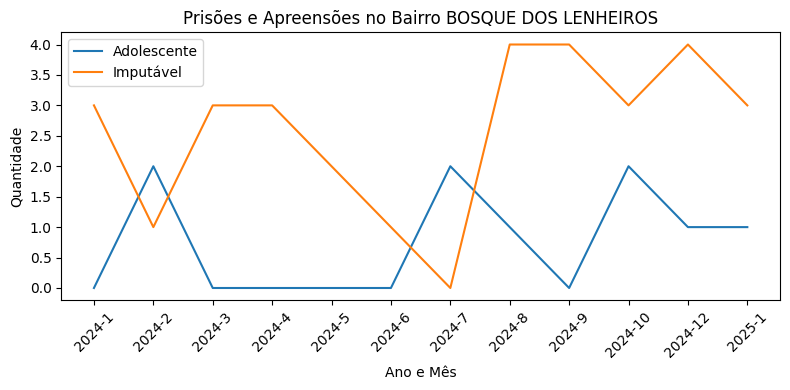

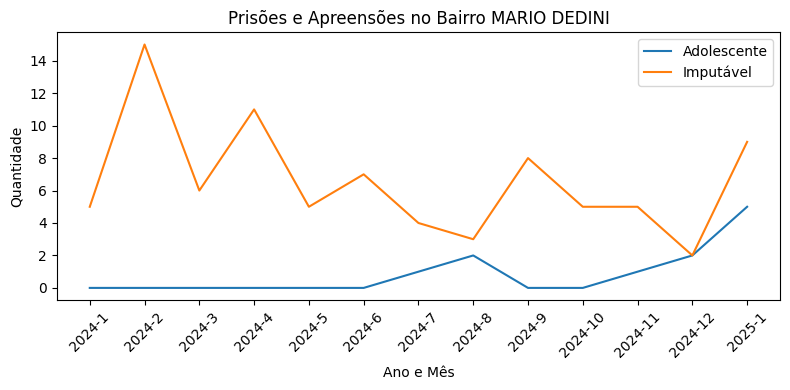

In [12]:
for bairro in contagem['BAIRRO'].unique():
  df_bairro = contagem[contagem['BAIRRO'] == bairro]
  plt.figure(figsize=(8, 4))
  plt.plot(df_bairro.index, df_bairro['Adolescente'], label='Adolescente')
  plt.plot(df_bairro.index, df_bairro['Imputável'], label='Imputável')
  plt.title(f'Prisões e Apreensões no Bairro {bairro}')
  plt.xlabel('Ano e Mês')
  plt.ylabel('Quantidade')
  plt.legend()
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.savefig(f'grafico_bairro_{bairro}.png')
  plt.show()
  plt.close()  # Fecha a figura para evitar sobreposição
